##  Maximum Likelihood Estimation

##  Probability distribution case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1000,)


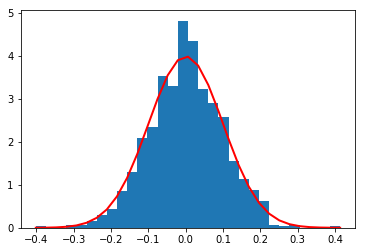

In [2]:
mu, sigma = 0, 0.1 # true mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
print(data.shape)

count, bins, ignored = plt.hist(data, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [3]:
from UQpy.Inference import Model
candidate_model = Model(model_type = 'pdf', model_name='normal')

In [4]:
from UQpy.Inference import MLEstimation
ml_estimator = MLEstimation(model=candidate_model, data=data)
print('ML estimates of the mean={0:.3f} and std. dev={1:.3f}'.format(ml_estimator.param[0], ml_estimator.param[1]))

ML estimates of the mean=0.001 and std. dev=0.098


## Regression (model linear in the parameters)

In [5]:
# Generate data
from scipy.stats import multivariate_normal

param_true = np.array([1.0, 2.0]).reshape((1, -1))
error_covariance = np.eye(50)

print(param_true.shape)
from UQpy.RunModel import RunModel
z = RunModel(samples=param_true, model_script='pfn_models.py', model_object_name = 'model_quadratic', 
             var_names = ['theta_1', 'theta_2'])
data = z.qoi_list[0].reshape((-1,))+multivariate_normal.rvs(mean=None, cov=error_covariance, size=1)

(1, 2)


In [6]:
candidate_model = Model(n_params=2, model_type='python', 
                        model_script='pfn_models.py', model_object_name = 'model_quadratic', 
                        error_covariance=error_covariance)

In [9]:
ml_estimator = MLEstimation(model=candidate_model, data=data)
print('Estimated parameters:', ml_estimator.param)

(1, 2)
Optimization terminated successfully.
         Current function value: 65.870972
         Iterations: 61
         Function evaluations: 116
Estimated parameters: [ 1.16787082  1.98240978]
